## **Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = False

In [3]:
from datetime import datetime, timedelta
import winsound

## **Datos**

In [4]:
df = pd.read_csv('Data/climate_change.csv')

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           706 non-null    datetime64[ns]
 1   co2            699 non-null    float64       
 2   relative_temp  706 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 16.7 KB


In [7]:
df.set_index('date', inplace=True)

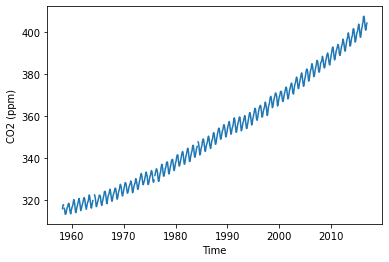

In [8]:
fig, ax = plt.subplots()

ax.plot(df.index, df['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)')

plt.show()

### **Zooming in a decade**

In [9]:
sixties = df["1960":"1969"]

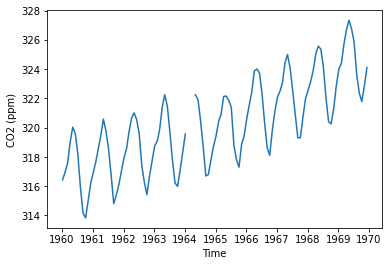

In [10]:
fig, ax = plt.subplots()

ax.plot(sixties.index, sixties['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)')

plt.show()

### **Zooming in a year**

In [11]:
sixty_seven = df["1967-01-01":"1967-12-31"]

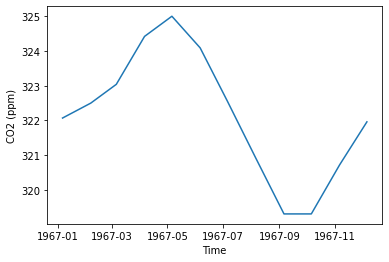

In [12]:
fig, ax = plt.subplots()

ax.plot(sixty_seven.index, sixty_seven['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)')

plt.show()

### **Plotting two time-series together**

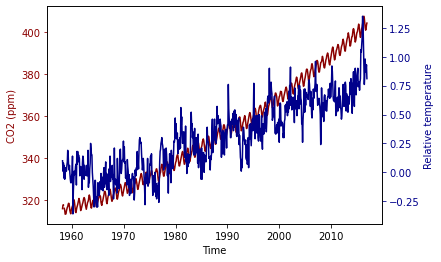

In [13]:
fig, ax = plt.subplots()

ax.plot(df.index, df['co2'], color='darkred')
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)', color='darkred')
ax.tick_params('y', colors='darkred')

ax2 = ax.twinx() 
ax2.plot(df.index, df['relative_temp'], color='darkblue')
ax2.set_ylabel('Relative temperature', color='darkblue')
ax2.tick_params('y', colors='darkblue')

plt.show()

### **Using a function**

In [14]:
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.tick_params('y', color=color)

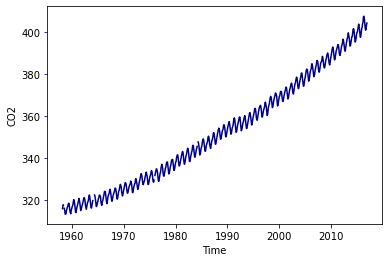

In [15]:
fig, ax = plt.subplots()
plot_timeseries(ax, df.index, df['co2'], 'darkblue', 'Time', 'CO2')

### **Annotations**

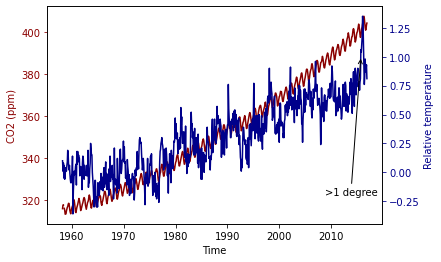

In [27]:
fig, ax = plt.subplots()

ax.plot(df.index, df['co2'], color='darkred')
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)', color='darkred')
ax.tick_params('y', colors='darkred')

ax2 = ax.twinx() 
ax2.plot(df.index, df['relative_temp'], color='darkblue')
ax2.set_ylabel('Relative temperature', color='darkblue')
ax2.tick_params('y', colors='darkblue')

ax2.annotate(
    ">1 degree", 
    xy=(pd.to_datetime('20151006'), 1),
    xytext=(pd.to_datetime('20081006'), -0.2),
    arrowprops={
        "arrowstyle": '->',
        "color": 'black'
    }
)

plt.show()